<a href="https://colab.research.google.com/github/YanqiLUO0608/1/blob/main/Copy_of_534_final_paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas mapclassify pandas shapely

In [ ]:
import geopandas as gpd
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

t = pd.read_csv("https://raw.githubusercontent.com/manouwan/ppd534/main/Los_Angeles_County_CVA_Social_Sensitivity_Index.csv")

In [ ]:
t.columns

Index(['Census_Tract', 'County', 'CSA_Type', 'CSA_Label', 'DRP_Planning_Area',
       'DPH_Service_Planning_Area', 'City_of_Los_Angeles_CPA', 'Population',
       'Children', 'Older_Adults', 'Older_Adults_Living_Alone',
       'Limited_English', 'No_High_School_Diploma', 'Female',
       'Female_Householder', 'Asthma', 'Cardiovascular_Disease', 'Disability',
       'No_Health_Insurance', 'Living_in_Group_Quarters', 'Mobile_Homes',
       'Rent_Burden', 'Renters', 'Median_Income', 'Poverty',
       'Households_Without_Vehicle_Acce', 'Transit_Access', 'Outdoor_Workers',
       'Unemployed', 'Foreign_Born', 'Library_Access',
       'No_Internet_Subscription', 'Voter_Turnout_Rate', 'Hispanic_Latinx',
       'White', 'Black', 'Native_Tribal', 'Asian', 'NHOPI', 'Other_Race',
       'Two_or_More_Races', 'SoVI_Score', 'SoVI_Thirds', 'ObjectId',
       'Shape__Area', 'Shape__Length'],
      dtype='object')

In [ ]:
t.head(n=30)

,Census_Tract,County,CSA_Type,CSA_Label,DRP_Planning_Area,DPH_Service_Planning_Area,City_of_Los_Angeles_CPA,Population,Children,Older_Adults,...,Native_Tribal,Asian,NHOPI,Other_Race,Two_or_More_Races,SoVI_Score,SoVI_Thirds,ObjectId,Shape__Area,Shape__Length
0,Census Tract 5709.02,Los Angeles County,City,City of Lakewood,Gateway Planning Area,East,NaN,3765,27.8,14.0,...,0.0,10.9,0.0,0.4,8.0,2.25,3,1,1.536760e+06,5208.283880
1,Census Tract 5715.02,Los Angeles County,City,City of Long Beach,Gateway Planning Area,South Bay,NaN,4700,24.6,14.0,...,0.0,21.7,0.1,0.6,1.3,-1.77,1,2,2.001416e+06,5938.830961
2,Census Tract 9106.05,Los Angeles County,City,City of Palmdale,Antelope Valley Planning Area,Antelope Valley,NaN,4710,38.4,7.0,...,0.0,5.3,0.0,0.2,2.5,2.39,3,3,1.996430e+06,5983.046762
3,Census Tract 9107.12,Los Angeles County,City,City of Palmdale,Antelope Valley Planning Area,Antelope Valley,NaN,2924,30.8,12.2,...,0.0,1.3,0.0,0.0,1.6,-1.05,2,4,3.107240e+06,7109.522437
4,Census Tract 9107.15,Los Angeles County,City,City of Palmdale,Antelope Valley Planning Area,Antelope Valley,NaN,6494,33.7,6.9,...,0.3,1.2,0.0,0.0,0.4,2.47,3,5,2.925328e+06,7944.828622
5,Census Tract 9200.23,Los Angeles County,City,City of Santa Clarita,Santa Clarita Valley Planning Area,San Fernando,NaN,2781,27.4,9.8,...,0.3,0.0,0.0,0.0,3.3,1.25,3,6,1.972059e+06,7663.449756
6,Census Tract 9200.37,Los Angeles County,City,City of Santa Clarita,Santa Clarita Valley Planning Area,San Fernando,NaN,8266,42.2,5.9,...,0.0,4.8,0.0,0.0,1.8,2.88,3,7,1.393531e+06,6542.732825
7,Census Tract 9200.45,Los Angeles County,City,City of Santa Clarita,Santa Clarita Valley Planning Area,San Fernando,NaN,4472,25.6,8.8,...,0.0,11.6,0.1,0.0,2.2,-3.29,1,8,2.775724e+06,7286.882754
8,Census Tract 9201.10,Los Angeles County,City,City of Santa Clarita,Santa Clarita Valley Planning Area,San Fernando,NaN,3093,27.9,4.6,...,0.0,17.0,0.3,0.0,0.6,-2.76,1,9,1.538540e+06,6039.909407
9,Census Tract 9203.14,Los Angeles County,City,City of Santa Clarita,Santa Clarita Valley Planning Area,San Fernando,NaN,3062,26.9,13.0,...,0.0,7.9,0.0,0.0,7.0,-2.30,1,10,1.669402e+07,19073.066468


In [ ]:
t.columns

Index(['Census_Tract', 'County', 'CSA_Type', 'CSA_Label', 'DRP_Planning_Area',
       'DPH_Service_Planning_Area', 'City_of_Los_Angeles_CPA', 'Population',
       'Children', 'Older_Adults', 'Older_Adults_Living_Alone',
       'Limited_English', 'No_High_School_Diploma', 'Female',
       'Female_Householder', 'Asthma', 'Cardiovascular_Disease', 'Disability',
       'No_Health_Insurance', 'Living_in_Group_Quarters', 'Mobile_Homes',
       'Rent_Burden', 'Renters', 'Median_Income', 'Poverty',
       'Households_Without_Vehicle_Acce', 'Transit_Access', 'Outdoor_Workers',
       'Unemployed', 'Foreign_Born', 'Library_Access',
       'No_Internet_Subscription', 'Voter_Turnout_Rate', 'Hispanic_Latinx',
       'White', 'Black', 'Native_Tribal', 'Asian', 'NHOPI', 'Other_Race',
       'Two_or_More_Races', 'SoVI_Score', 'SoVI_Thirds', 'ObjectId',
       'Shape__Area', 'Shape__Length'],
      dtype='object')

(0.0, 161.605)

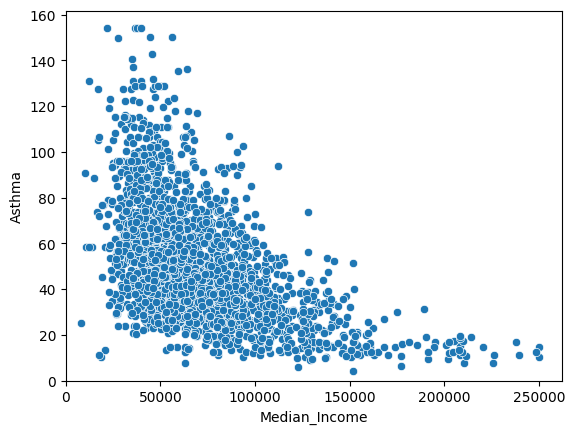

In [ ]:
# scatter plot for scrutinizing the relationship between median income and incidences of asthma in the context pertaining to the ecological environment
import seaborn as sns
ax = sns.scatterplot(x=t["Median_Income"], y=t["Asthma"])
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)

(0.0, 161.605)

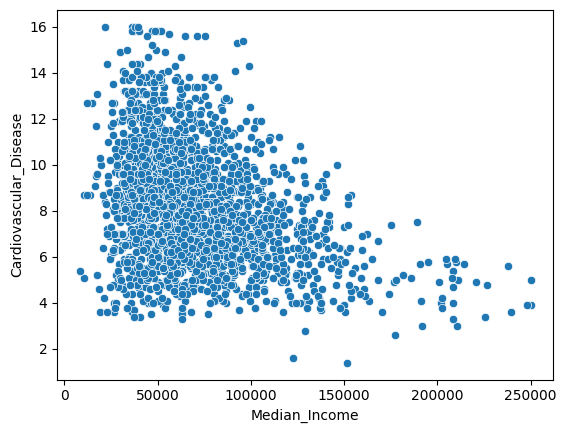

In [ ]:
bx = sns.scatterplot(x=t["Median_Income"], y=t["Cardiovascular_Disease"])
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)

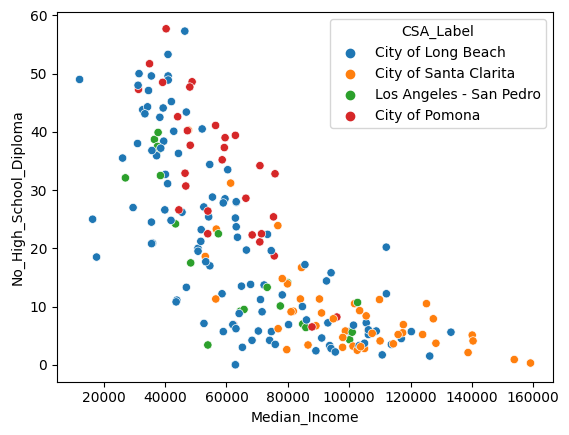

In [ ]:
CSA = ["City of Long Beach", "City of Santa Clarita", "Los Angeles - San Pedro", "City of Pomona"]
race_income = t[t["CSA_Label"].isin(CSA)]
cx = sns.scatterplot(x=race_income["Median_Income"],
                     y=race_income["No_High_School_Diploma"],
                     hue=race_income["CSA_Label"])

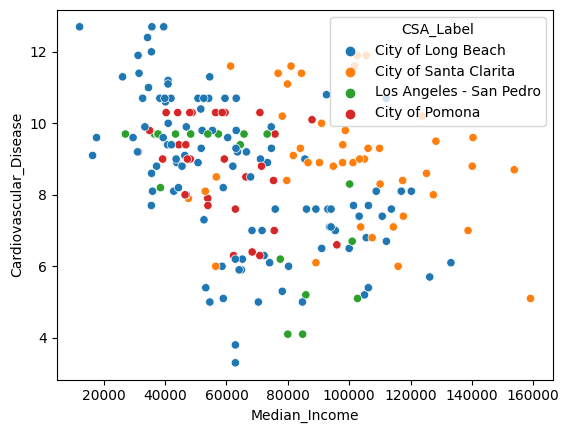

In [ ]:
CSA2 = ["City of Long Beach", "City of Santa Clarita", "Los Angeles - San Pedro", "City of Pomona"]
race_car = t[t["CSA_Label"].isin(CSA)]
dx = sns.scatterplot(x=race_car["Median_Income"],
                     y=race_car["Cardiovascular_Disease"],
                     hue=race_car["CSA_Label"])

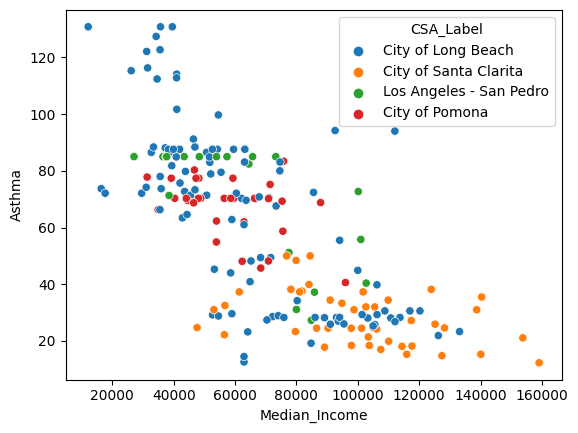

In [ ]:
CSA3 = ["City of Long Beach", "City of Santa Clarita", "Los Angeles - San Pedro", "City of Pomona"]
race_asth = t[t["CSA_Label"].isin(CSA)]
ex = sns.scatterplot(x=race_asth["Median_Income"],
                     y=race_asth["Asthma"],
                     hue=race_asth["CSA_Label"])

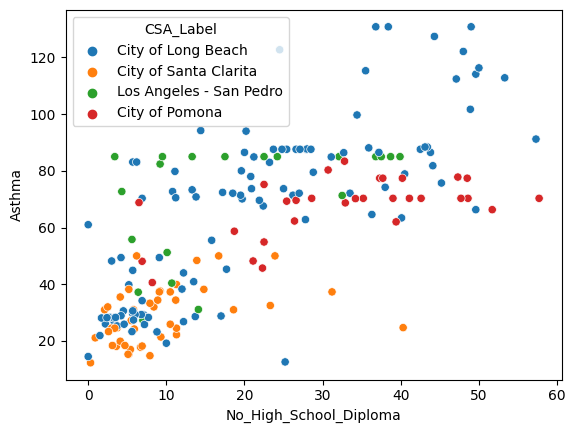

In [ ]:
CSA4 = ["City of Long Beach", "City of Santa Clarita", "Los Angeles - San Pedro", "City of Pomona"]
race_edu = t[t["CSA_Label"].isin(CSA)]
fx = sns.scatterplot(x=race_edu["No_High_School_Diploma"],
                     y=race_edu["Asthma"],
                     hue=race_edu["CSA_Label"])

(0.0, 161.605)

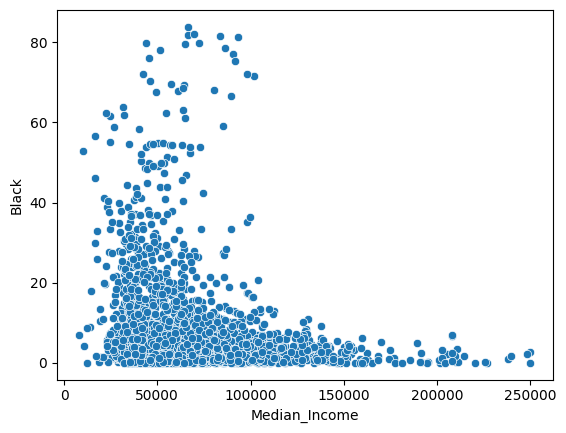

In [ ]:
gx = sns.scatterplot(x=t["Median_Income"], y=t["Black"])
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)

(0.0, 262087.85)

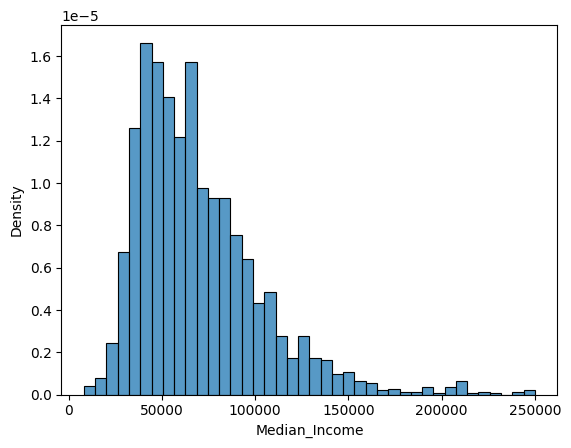

In [ ]:
hx = sns.histplot(x=t["Median_Income"], stat="density", kde=False)
ax.set_xlim(left=0)

Text(0.5, 1.0, 'Box plot of median income in different DRP_Planning_Area')

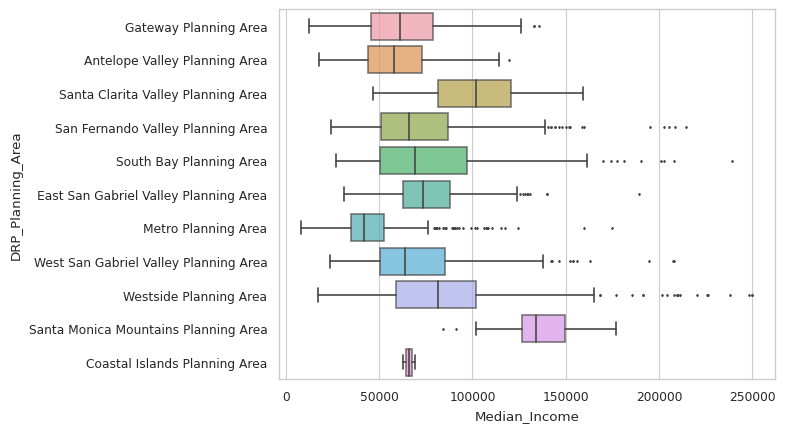

In [ ]:
sns.set_style("whitegrid")
sns.set_context("paper")
ix = sns.boxplot(x=t["Median_Income"],
                 y=t["DRP_Planning_Area"],
                 fliersize=1,
                 boxprops={"alpha": 0.7})
ax.set_xlim(left=0)
ax.set_title("Box plot of median income in different DRP_Planning_Area")

Text(0.5, 1.0, 'Box plot of Cardiovascular Disease in different DRP_Planning_Area')

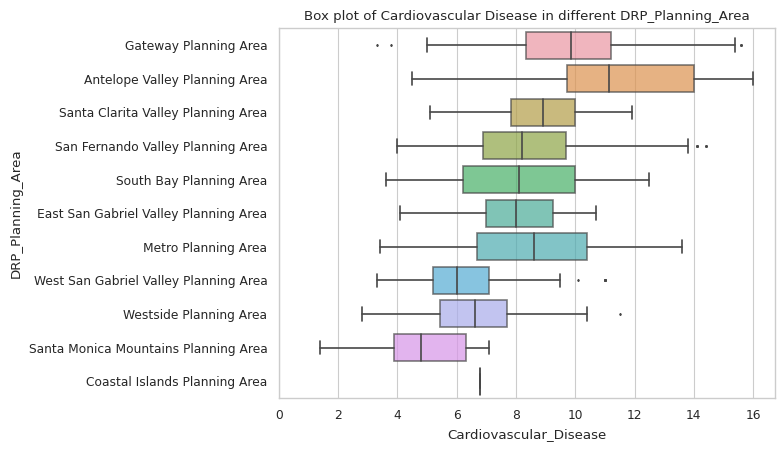

In [ ]:
# improving the bad visualization from above
sns.set_style("whitegrid")
sns.set_context("paper")
ax = sns.boxplot(x=t["Cardiovascular_Disease"],
                 y=t["DRP_Planning_Area"],
                 fliersize=1,
                 boxprops={"alpha": 0.7})
ax.set_xlim(left=0)
ax.set_title("Box plot of Cardiovascular Disease in different DRP_Planning_Area")

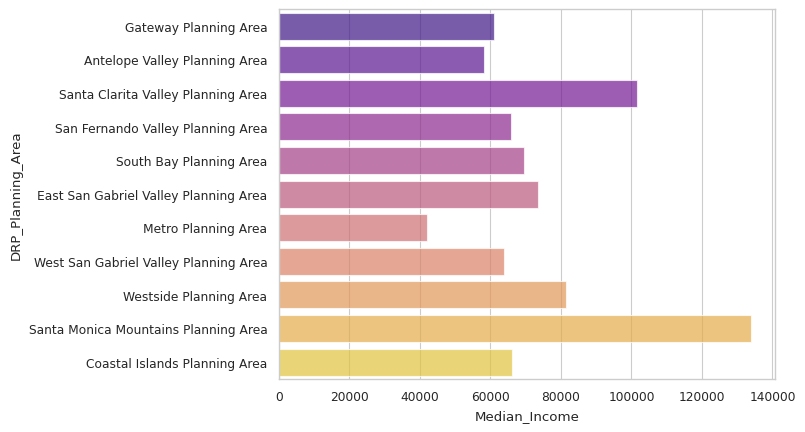

In [ ]:
ax = sns.barplot(x=t["Median_Income"],
                 y=t["DRP_Planning_Area"],
                 estimator="median",
                 errorbar=None,
                 alpha=0.7,
                 palette="plasma")

In [ ]:
cities = ["City of Long Beach",
          "City of Santa Clarita",
          "Los Angeles - San Pedro",
          "City of Pomona",]
mask = t["CSA_Label"].isin(cities)
df_sc = t[mask]
df_sc.shape


(204, 46)

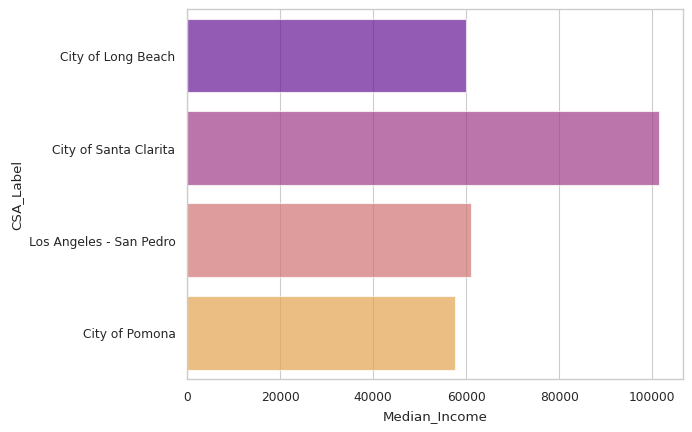

In [ ]:
ax = sns.barplot(x=df_sc["Median_Income"],
                 y=df_sc["CSA_Label"],
                 estimator="median",
                 errorbar=None,
                 alpha=0.7,
                 palette="plasma")

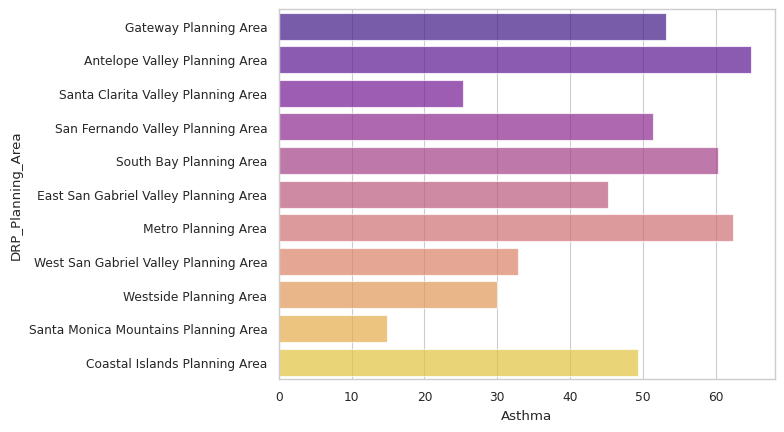

In [ ]:
ax = sns.barplot(x=t["Asthma"],
                 y=t["DRP_Planning_Area"],
                 estimator="median",
                 errorbar=None,
                 alpha=0.7,
                 palette="plasma")

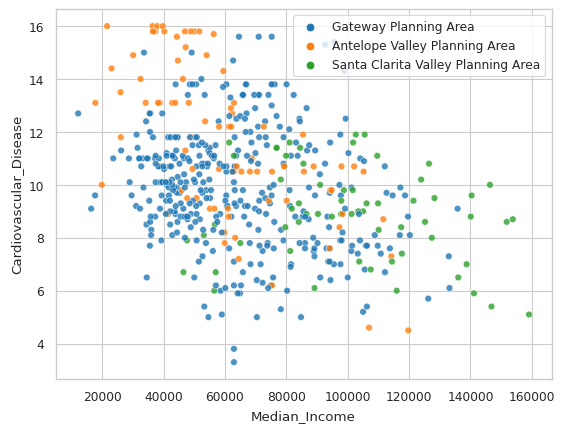

In [ ]:
# comparing relationship between median income and cardiovascular disease among three areas
areas = ["Gateway Planning Area", "Antelope Valley Planning Area", "Santa Clarita Valley Planning Area"]
t_areas = t[t["DRP_Planning_Area"].isin(areas)]
ax = sns.scatterplot(x=t["Median_Income"],
                     y=t["Cardiovascular_Disease"],
                     hue=t_areas["DRP_Planning_Area"],
                     alpha=0.8)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels)

In [ ]:
healths = gpd.read_file("/content/drive/Shareddrives/Group 1 534 Final/SocialSens")
healths.head()

,Census_Tra,County,CSA_Type,CSA_Label,DRP_Planni,DPH_Servic,City_of_Lo,Population,Children,Older_Adul,...,Asian,NHOPI,Other_Race,Two_or_Mor,SoVI_Score,SoVI_Third,ObjectId,Shape__Are,Shape__Len,geometry
0,Census Tract 5709.02,Los Angeles County,City,City of Lakewood,Gateway Planning Area,East,None,3765,27.8,14.0,...,10.9,0.0,0.4,8.0,2.25,3,1,1.536760e+06,5208.283880,"POLYGON ((-118.12509 33.86032, -118.12287 33.8..."
1,Census Tract 5715.02,Los Angeles County,City,City of Long Beach,Gateway Planning Area,South Bay,None,4700,24.6,14.0,...,21.7,0.1,0.6,1.3,-1.77,1,2,2.001416e+06,5938.830961,"POLYGON ((-118.19274 33.84376, -118.18975 33.8..."
2,Census Tract 9106.05,Los Angeles County,City,City of Palmdale,Antelope Valley Planning Area,Antelope Valley,None,4710,38.4,7.0,...,5.3,0.0,0.2,2.5,2.39,3,3,1.996430e+06,5983.046762,"POLYGON ((-118.07616 34.57281, -118.06728 34.5..."
3,Census Tract 9107.12,Los Angeles County,City,City of Palmdale,Antelope Valley Planning Area,Antelope Valley,None,2924,30.8,12.2,...,1.3,0.0,0.0,1.6,-1.05,2,4,3.107240e+06,7109.522437,"POLYGON ((-118.05857 34.55809, -118.05847 34.5..."
4,Census Tract 9107.15,Los Angeles County,City,City of Palmdale,Antelope Valley Planning Area,Antelope Valley,None,6494,33.7,6.9,...,1.2,0.0,0.0,0.4,2.47,3,5,2.925328e+06,7944.828622,"POLYGON ((-118.08506 34.55654, -118.08485 34.5..."


In [ ]:
healths.columns

Index(['Census_Tra', 'County', 'CSA_Type', 'CSA_Label', 'DRP_Planni',
       'DPH_Servic', 'City_of_Lo', 'Population', 'Children', 'Older_Adul',
       'Older_Ad_1', 'Limited_En', 'No_High_Sc', 'Female', 'Female_Hou',
       'Asthma', 'Cardiovasc', 'Disability', 'No_Health_', 'Living_in_',
       'Mobile_Hom', 'Rent_Burde', 'Renters', 'Median_Inc', 'Poverty',
       'Households', 'Transit_Ac', 'Outdoor_Wo', 'Unemployed', 'Foreign_Bo',
       'Library_Ac', 'No_Interne', 'Voter_Turn', 'Hispanic_L', 'White',
       'Black', 'Native_Tri', 'Asian', 'NHOPI', 'Other_Race', 'Two_or_Mor',
       'SoVI_Score', 'SoVI_Third', 'ObjectId', 'Shape__Are', 'Shape__Len',
       'geometry'],
      dtype='object')

In [ ]:
healths.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
L = gpd.read_file("/content/drive/Shareddrives/Group 1 534 Final/L")
L.head(n=10)

,OBJECTID,STUD_AR_ID,STUD_AR_NM,STUD_AR_LB,TOOLKIT_ID,Acres,AC_PER_1K,RepPrkAc,NEED_DESCP,PCT_Walk,...,Other_Race,Multi_Race,No_HS,HS_Grad,Some_Colle,College,unemprt_cy,SHAPE_Leng,SHAPE_Area,geometry
0,1,129,City of LA Brentwood - Pacific Palisades,City of LA Brentwood - Pacific Palisades,129,24319.323463,6.523099,378.979,Moderate,29.704955,...,0.228326,3.898845,2,4,15,79,12.6,0.503895,0.009613,"POLYGON ((-118.56876 34.13169, -118.56546 34.1..."
1,2,147,City of LA Westlake,City of LA Westlake,147,1943.364931,0.668962,76.649,Very High,81.378611,...,0.242667,0.981736,40,21,18,22,18.2,0.121857,0.000768,"POLYGON ((-118.25005 34.06154, -118.25018 34.0..."
2,3,136,City of LA Encino - Tarzana,City of LA Encino - Tarzana,136,12988.798545,8.805535,627.412,Moderate,10.459357,...,0.225256,5.134746,6,14,25,55,14.2,0.339079,0.005139,"POLYGON ((-118.56223 34.18399, -118.55349 34.1..."
3,4,139,City of LA Sunland - Tujunga - Lake View Terra...,City of LA Sunland - Tujunga - Lake View Terra...,139,16428.801938,8.599252,559.218,Low,42.826803,...,0.223619,3.196347,14,25,33,29,15.2,0.606599,0.006508,"POLYGON ((-118.40754 34.28723, -118.40739 34.2..."
4,5,059,City of LA Central City North,City of LA Central City North,59,2022.349957,1.554053,34.716,High,49.448705,...,0.235678,1.602611,29,19,20,32,17.4,0.174426,0.000799,"POLYGON ((-118.22197 34.01495, -118.22204 34.0..."
5,6,138,City of LA Silver Lake - Echo Park - Elysian V...,City of LA Silver Lake - Echo Park - Elysian V...,138,4552.371487,8.837859,634.451,Moderate,55.523755,...,0.254093,2.436789,16,14,21,48,18.0,0.207326,0.001800,"POLYGON ((-118.25005 34.06154, -118.25134 34.0..."
6,7,120,City of LA Sun Valley - La Tuna Canyon,City of LA Sun Valley - La Tuna Canyon,120,10504.568668,1.199641,110.397,High,29.382559,...,0.230917,1.419425,30,26,24,20,17.1,0.367390,0.004160,"POLYGON ((-118.33747 34.22132, -118.33746 34.2..."
7,8,094,City of LA North Hollywood - Valley Village,City of LA North Hollywood - Valley Village,94,6791.468849,1.123886,158.387,Very High,39.173281,...,0.378468,2.692969,16,19,30,35,18.8,0.243575,0.002688,"POLYGON ((-118.37033 34.19639, -118.37029 34.1..."
8,9,096,City of LA Sylmar,City of LA Sylmar,96,7888.760176,4.221127,342.861,Moderate,35.089855,...,0.171960,1.040061,28,28,26,18,14.9,0.345790,0.003127,"POLYGON ((-118.41031 34.29120, -118.41171 34.2..."
9,10,117,City of LA Arleta - Pacoima,City of LA Arleta - Pacoima,117,6619.442128,4.540436,481.129,High,37.233899,...,0.138630,0.506749,41,29,19,11,17.6,0.254521,0.002622,"POLYGON ((-118.41031 34.29120, -118.41031 34.2..."


In [ ]:
L.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
healths.crs == L.crs

True

In [ ]:
L.dtypes

OBJECTID         int64
STUD_AR_ID      object
STUD_AR_NM      object
STUD_AR_LB      object
TOOLKIT_ID       int64
                ...   
College          int64
unemprt_cy     float64
SHAPE_Leng     float64
SHAPE_Area     float64
geometry      geometry
Length: 98, dtype: object

In [ ]:
L.columns

Index(['OBJECTID', 'STUD_AR_ID', 'STUD_AR_NM', 'STUD_AR_LB', 'TOOLKIT_ID',
       'Acres', 'AC_PER_1K', 'RepPrkAc', 'NEED_DESCP', 'PCT_Walk',
       'aggregatio', 'HasData', 'ORIGINAL_O', 'sourceCoun', 'population',
       'householdt', 'householdi', 'educationa', 'educatio_1', 'educatio_2',
       'educatio_3', 'educatio_4', 'educatio_5', 'educatio_6', 'educatio_7',
       'educatio_8', 'sports_mp3', 'sports_m_1', 'sports_m_2', 'sports_m_3',
       'sports_m_4', 'sports_m_5', 'sports_m_6', 'sports_m_7', 'sports_m_8',
       'sports_m_9', 'sports_m10', 'sports_m11', 'sports_m12', 'sports_m13',
       'F5yearincr', 'F5yearin_1', 'F5yearin_2', 'F5yearin_3', 'F5yearin_4',
       'F5yearin_5', 'F5yearin_6', 'F5yearin_7', 'F5yearin_8', 'F5yearin_9',
       'F5yearin10', 'F5yearin11', 'F5yearin12', 'F5yearin13', 'F5yearin14',
       'F5yearin15', 'F5yearin16', 'F5yearin17', 'F5yearin18', 'F1yearincr',
       'F1yearin_1', 'MEAN_Asthm', 'MEAN_Low_B', 'MEAN_Cardi', 'aggregat_1',
       'HasDat

In [ ]:
healths.dtypes

Census_Tra      object
County          object
CSA_Type        object
CSA_Label       object
DRP_Planni      object
DPH_Servic      object
City_of_Lo      object
Population       int64
Children       float64
Older_Adul     float64
Older_Ad_1     float64
Limited_En     float64
No_High_Sc     float64
Female         float64
Female_Hou     float64
Asthma         float64
Cardiovasc     float64
Disability     float64
No_Health_     float64
Living_in_     float64
Mobile_Hom     float64
Rent_Burde     float64
Renters        float64
Median_Inc       int64
Poverty        float64
Households     float64
Transit_Ac     float64
Outdoor_Wo     float64
Unemployed     float64
Foreign_Bo     float64
Library_Ac     float64
No_Interne     float64
Voter_Turn     float64
Hispanic_L     float64
White          float64
Black          float64
Native_Tri     float64
Asian          float64
NHOPI          float64
Other_Race     float64
Two_or_Mor     float64
SoVI_Score     float64
SoVI_Third       int64
ObjectId   

In [ ]:
A = gpd.read_file("/content/drive/Shareddrives/Group 1 534 Final/COVID-19_Vulnerability_and_Recovery_Index")
A.head(n=10)

,OBJECTID,statefp,countyfp,tractce,geoid,name,namelsad,mtfcc,funcstat,aland,...,guninj_pct,asthma_rat,asthma_pct,heart_rate,heart_pctl,diabetes_r,diabetes_p,SHAPE_Leng,SHAPE_Area,geometry
0,9832,06,037,533002,06037533002,5330.02,Census Tract 5330.02,G5020,S,287767.0,...,94.26394,7.18677,82.51103,30.41848,62.93622,26.07302,96.47012,0.022713,0.000028,"POLYGON ((-118.24336 33.98042, -118.24116 33.9..."
1,9833,06,037,242202,06037242202,2422.02,Census Tract 2422.02,G5020,S,403612.0,...,98.99719,10.13095,95.82832,28.70436,51.50421,28.89197,99.03730,0.033213,0.000039,"POLYGON ((-118.24327 33.95327, -118.24191 33.9..."
2,9834,06,037,540600,06037540600,5406,Census Tract 5406,G5020,S,937162.0,...,96.30967,12.44029,98.51584,32.11576,72.72363,24.69046,94.26394,0.038840,0.000092,"POLYGON ((-118.23897 33.92463, -118.23906 33.9..."
3,9835,06,037,209402,06037209402,2094.02,Census Tract 2094.02,G5020,S,136231.0,...,74.60890,5.52862,62.81588,24.73376,28.31929,18.97528,75.13037,0.014674,0.000013,"POLYGON ((-118.27894 34.05538, -118.27793 34.0..."
4,9836,06,037,239310,06037239310,2393.10,Census Tract 2393.10,G5020,S,534855.0,...,98.43562,9.49411,93.38147,27.93977,45.72804,23.87089,92.81990,0.028827,0.000052,"POLYGON ((-118.28054 33.98238, -118.27831 33.9..."
5,9837,06,037,240010,06037240010,2400.10,Census Tract 2400.10,G5020,S,588434.0,...,98.35540,9.80069,94.66506,28.60551,50.78219,27.44454,97.59326,0.038817,0.000057,"POLYGON ((-118.27168 33.96010, -118.26950 33.9..."
6,9838,06,037,575300,06037575300,5753,Census Tract 5753,G5020,S,648065.0,...,83.19294,9.46262,92.94023,36.87194,88.60810,22.05050,87.16406,0.031908,0.000063,"POLYGON ((-118.18939 33.78578, -118.18938 33.7..."
7,9839,06,037,542105,06037542105,5421.05,Census Tract 5421.05,G5020,S,623486.0,...,93.82270,8.31914,88.12675,31.72882,69.99599,29.02028,99.59888,0.035336,0.000061,"POLYGON ((-118.20262 33.89607, -118.20162 33.8..."
8,9840,06,037,239202,06037239202,2392.02,Census Tract 2392.02,G5020,S,1275622.0,...,97.19214,9.07587,91.77698,28.00696,47.21219,24.00587,92.94023,0.049230,0.000124,"POLYGON ((-118.27394 33.98515, -118.27394 33.9..."
9,9841,06,037,240301,06037240301,2403.01,Census Tract 2403.01,G5020,S,468912.0,...,97.79382,9.70535,93.82270,31.05460,66.62655,27.92137,98.07461,0.027501,0.000046,"POLYGON ((-118.28706 33.96006, -118.28271 33.9..."


In [ ]:
A.columns

Index(['OBJECTID', 'statefp', 'countyfp', 'tractce', 'geoid', 'name',
       'namelsad', 'mtfcc', 'funcstat', 'aland', 'awater', 'intptlat',
       'intptlon', 'geo_id_ful', 'geo_id', 'fips', 'csa', 'sup_distri',
       'tot_pop', 'hud_qct', 'risk_index', 'severity_i', 'recovery_i',
       'overall_in', 'index_cate', 'index_quin', 'overcrowdi', 'overcrow_1',
       'poverty_20', 'poverty__1', 'poverty_se', 'poverty__2', 'unemployme',
       'unemploy_1', 'essential_', 'essentia_1', 'uninsured_', 'uninsure_1',
       'single_par', 'single_p_1', 'noncitizen', 'noncitiz_1', 'guninj_rat',
       'guninj_pct', 'asthma_rat', 'asthma_pct', 'heart_rate', 'heart_pctl',
       'diabetes_r', 'diabetes_p', 'SHAPE_Leng', 'SHAPE_Area', 'geometry'],
      dtype='object')

In [ ]:
healths.crs == A.crs

True

In [ ]:
A_health = gpd.sjoin(A, healths, how="left", predicate="within")
A_health.shape

(2495, 100)

In [ ]:
A_health.head()

,OBJECTID,statefp,countyfp,tractce,geoid,name,namelsad,mtfcc,funcstat,aland,...,Native_Tri,Asian,NHOPI,Other_Race,Two_or_Mor,SoVI_Score,SoVI_Third,ObjectId,Shape__Are,Shape__Len
0,9832,06,037,533002,06037533002,5330.02,Census Tract 5330.02,G5020,S,287767.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9833,06,037,242202,06037242202,2422.02,Census Tract 2422.02,G5020,S,403612.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9834,06,037,540600,06037540600,5406,Census Tract 5406,G5020,S,937162.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9835,06,037,209402,06037209402,2094.02,Census Tract 2094.02,G5020,S,136231.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9836,06,037,239310,06037239310,2393.10,Census Tract 2393.10,G5020,S,534855.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
A_L = gpd.sjoin(A, L, how="left", predicate="within")
A_L.shape

(3382, 151)

In [ ]:
A_L.head()

,OBJECTID_left,statefp,countyfp,tractce,geoid,name,namelsad,mtfcc,funcstat,aland,...,Pac_Island,Other_Race,Multi_Race,No_HS,HS_Grad,Some_Colle,College,unemprt_cy,SHAPE_Leng_right,SHAPE_Area_right
0,9832,06,037,533002,06037533002,5330.02,Census Tract 5330.02,G5020,S,287767.0,...,0.220564,0.240195,2.349152,20.0,21.0,26.0,34.0,16.8,8.853214,1.036248
1,9833,06,037,242202,06037242202,2422.02,Census Tract 2422.02,G5020,S,403612.0,...,0.057037,0.190338,0.767121,45.0,29.0,21.0,6.0,20.8,0.271121,0.002198
1,9833,06,037,242202,06037242202,2422.02,Census Tract 2422.02,G5020,S,403612.0,...,0.220564,0.240195,2.349152,20.0,21.0,26.0,34.0,16.8,8.853214,1.036248
2,9834,06,037,540600,06037540600,5406,Census Tract 5406,G5020,S,937162.0,...,0.220564,0.240195,2.349152,20.0,21.0,26.0,34.0,16.8,8.853214,1.036248
3,9835,06,037,209402,06037209402,2094.02,Census Tract 2094.02,G5020,S,136231.0,...,0.097918,0.242667,0.981736,40.0,21.0,18.0,22.0,18.2,0.121857,0.000768


In [ ]:
A_L.dtypes

OBJECTID_left         int64
statefp              object
countyfp             object
tractce              object
geoid                object
                     ...   
Some_Colle          float64
College             float64
unemprt_cy          float64
SHAPE_Leng_right    float64
SHAPE_Area_right    float64
Length: 151, dtype: object

In [ ]:
A_L.columns

Index(['OBJECTID_left', 'statefp', 'countyfp', 'tractce', 'geoid', 'name',
       'namelsad', 'mtfcc', 'funcstat', 'aland',
       ...
       'Pac_Island', 'Other_Race', 'Multi_Race', 'No_HS', 'HS_Grad',
       'Some_Colle', 'College', 'unemprt_cy', 'SHAPE_Leng_right',
       'SHAPE_Area_right'],
      dtype='object', length=151)

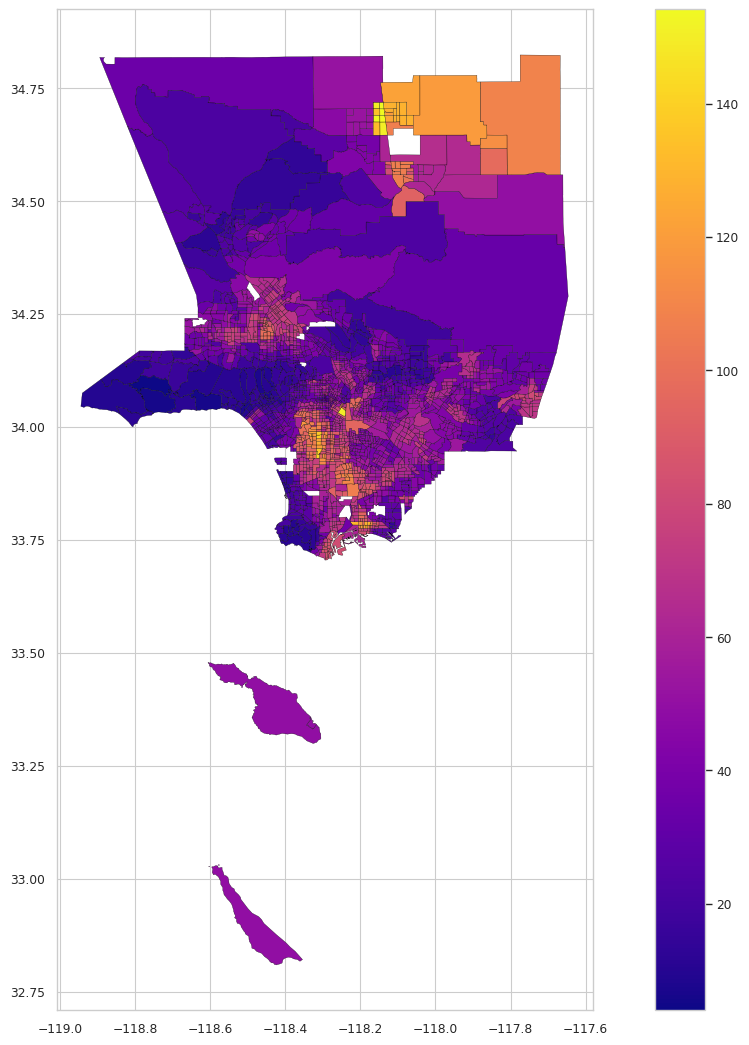

In [ ]:
ax = healths.plot(column="Asthma",
                        cmap="plasma",
                        edgecolor="k",
                        lw=0.2,
                        figsize=(16, 13),
                        legend=True)


(-119.00955942499999, -117.581461875, 32.708189045000005, 34.924019255)

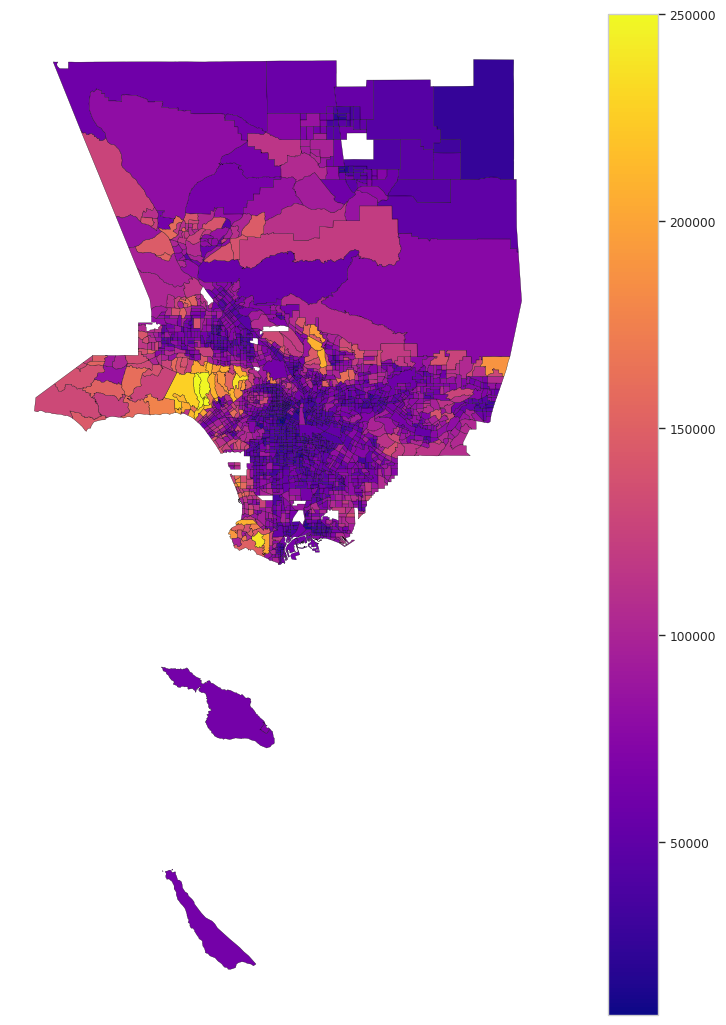

In [ ]:
bx = healths.plot(column="Median_Inc",
                        cmap="plasma",
                        edgecolor="k",
                        lw=0.2,
                        figsize=(16, 13),
                        legend=True)
bx.axis("off")

Text(0.5, 1.0, 'Mean Asthma in LA County')

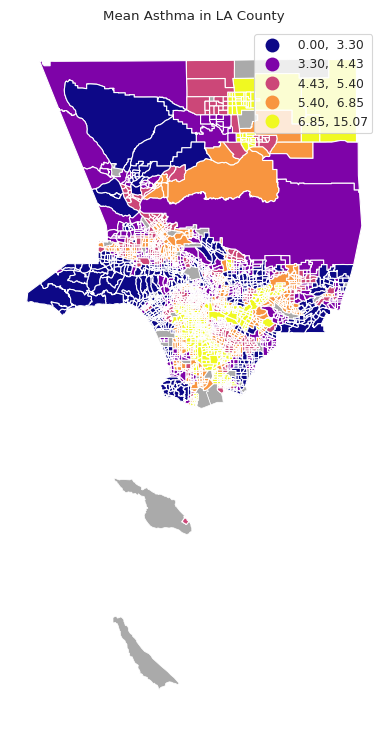

In [ ]:
ax = A_L.plot(facecolor="#aaaaaa", edgecolor="w", lw=0.5, figsize=(12, 9), legend=False)

ax = A.dropna().plot(ax=ax,
                       markersize=10,
                       legend=True,
                       cmap="plasma",
                       column="asthma_rat",
                       scheme="Quantiles")
ax.axis("off")
ax.set_title("Mean Asthma in LA County")


# Stats Analysis

In [ ]:
healths.dtypes

Census_Tra      object
County          object
CSA_Type        object
CSA_Label       object
DRP_Planni      object
DPH_Servic      object
City_of_Lo      object
Population       int64
Children       float64
Older_Adul     float64
Older_Ad_1     float64
Limited_En     float64
No_High_Sc     float64
Female         float64
Female_Hou     float64
Asthma         float64
Cardiovasc     float64
Disability     float64
No_Health_     float64
Living_in_     float64
Mobile_Hom     float64
Rent_Burde     float64
Renters        float64
Median_Inc       int64
Poverty        float64
Households     float64
Transit_Ac     float64
Outdoor_Wo     float64
Unemployed     float64
Foreign_Bo     float64
Library_Ac     float64
No_Interne     float64
Voter_Turn     float64
Hispanic_L     float64
White          float64
Black          float64
Native_Tri     float64
Asian          float64
NHOPI          float64
Other_Race     float64
Two_or_Mor     float64
SoVI_Score     float64
SoVI_Third       int64
ObjectId   

# Regression section

In [ ]:
response = "householdi"
predictors = ["asthma_rat", "heart_rate", "diabetes_r"]

data = A_L [[response] + predictors].dropna()

X = data[predictors]
y = data[response]

model = sm.OLS(y, sm.add_constant(X))
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             householdi   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     169.7
Date:                Tue, 05 Dec 2023   Prob (F-statistic):          2.73e-102
Time:                        02:24:20   Log-Likelihood:                -35627.
No. Observations:                3300   AIC:                         7.126e+04
Df Residuals:                    3296   BIC:                         7.129e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.617e+04    890.435     85.543      0.0

In [ ]:
# correlation matrix
variables = ["householdi", "asthma_rat", "heart_rate", "diabetes_r"]
correlations = A_L[variables].corr().round(2)
correlations

,householdi,asthma_rat,heart_rate,diabetes_r
householdi,1.00,-0.30,-0.06,-0.36
asthma_rat,-0.30,1.00,0.30,0.78
heart_rate,-0.06,0.30,1.00,0.35
diabetes_r,-0.36,0.78,0.35,1.00


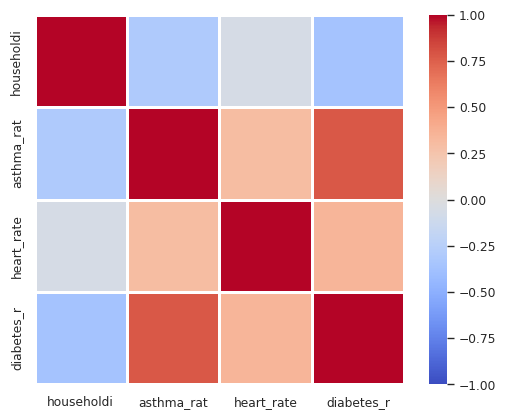

In [ ]:
lx = sns.heatmap(correlations,
                 vmin=-1,
                 vmax=1,
                 center=0,
                 cmap="coolwarm",
                 square=True,
                 linewidths=1)

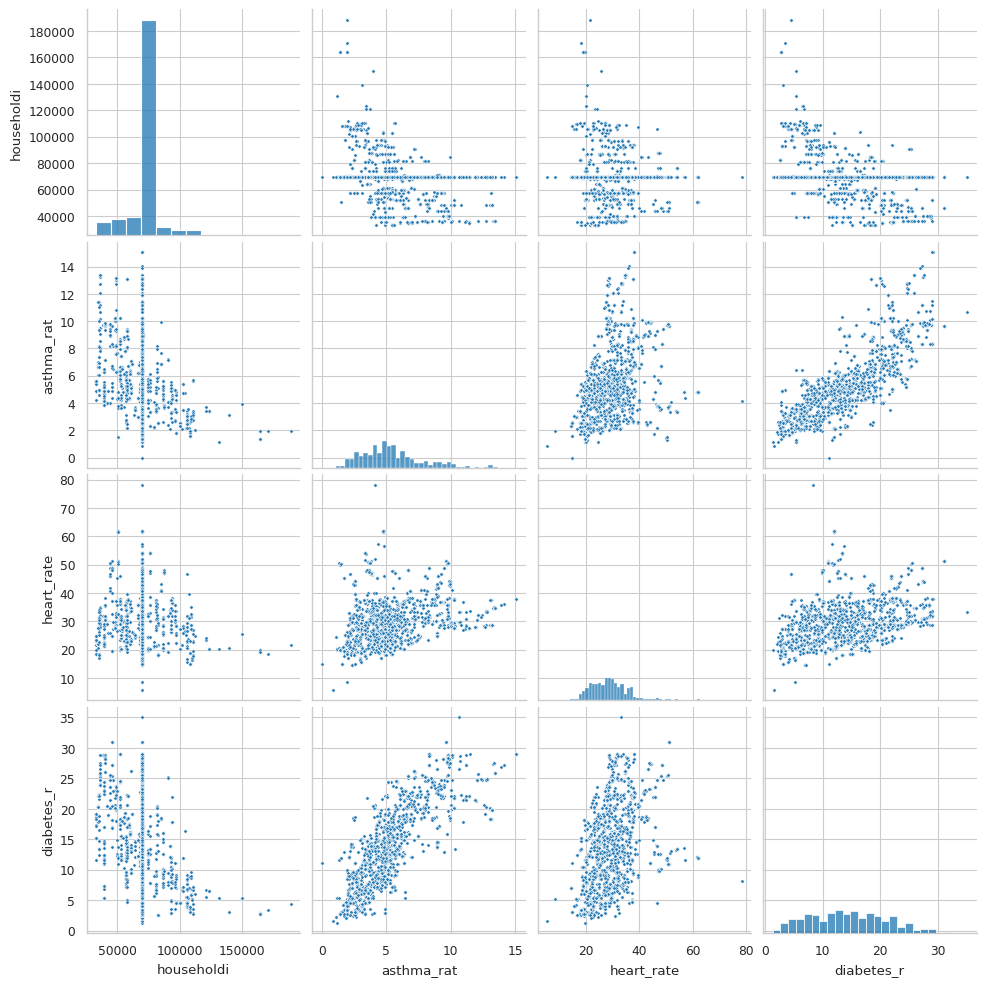

In [ ]:
grid = sns.pairplot(A_L[variables].dropna(), markers=".")

In [ ]:
A_L["householdi_log"] = np.log(A_L["householdi"])

In [ ]:
variables = ["householdi_log", "asthma_rat", "heart_rate", "diabetes_r"]
correlations = A_L[variables].corr().round(2)
correlations

,householdi_log,asthma_rat,heart_rate,diabetes_r
householdi_log,1.00,-0.29,-0.03,-0.35
asthma_rat,-0.29,1.00,0.30,0.78
heart_rate,-0.03,0.30,1.00,0.35
diabetes_r,-0.35,0.78,0.35,1.00


In [ ]:
response = "Median_Income"
predictors = ["Renters", "Households_Without_Vehicle_Acce", "Transit_Access", "Limited_English"]

data = tracts[[response] + predictors].dropna()

x = data[predictors]
y = data[response]

model = sm.OLS(y, sm.add_constant(x))
result = model.fit()
print(result.summary())

NameError: ignored